In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
#run from repo root...
os.chdir(r"C:/Users/jamed\Documents/repos/lidar_2/LidarClassifcationForFloodModelling")

In [8]:
from structured_data_utils.data import ModelData
from structured_data_utils.structured_data_interfacing import standardise_dataset


In [9]:
standardise_dataset("WILLOWAN", force=True)

In [11]:
willowan_data = ModelData()
willowan_data.prepare_data("WILLOWAN", sliding_window_size=300, stride=50)

pad_x: 1320, pad_y: 1028
1257.0
starting
torch.Size([1739, 300, 300])
tensor([0.5788, 0.5963, 0.6050,  ..., 0.7239, 0.7151, 0.7064])
torch.Size([1672, 300, 300])


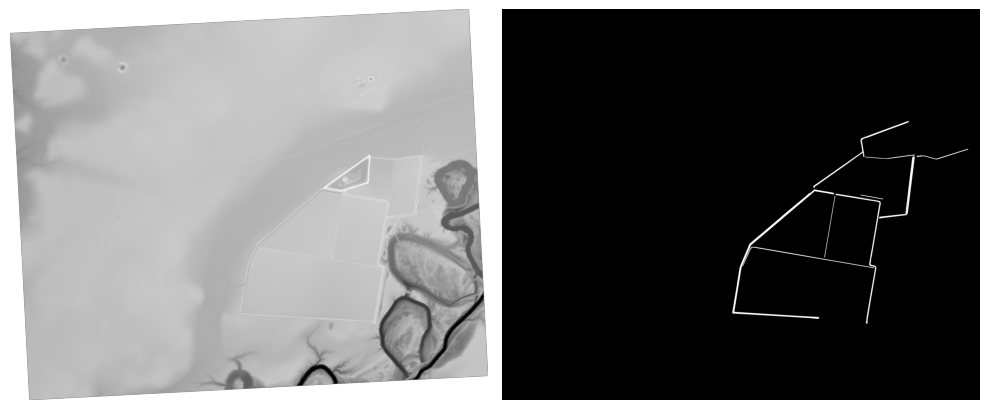

In [12]:
from model_prototyping.unet_implementation.metrics import show_matrices
show_matrices([willowan_data.data_with_labels.data[0], willowan_data.data_with_labels.labels[0]])

In [13]:
standardise_dataset("BEERMERY", force=True)

In [14]:
beermery_data = ModelData()
beermery_data.prepare_data("BEERMERY", sliding_window_size=300, stride=100)

pad_x: 675, pad_y: 532
562.0
starting
torch.Size([2870, 300, 300])
tensor([0.0000, 0.0000, 0.0000,  ..., 0.1129, 0.0954, 0.0780])
torch.Size([2625, 300, 300])


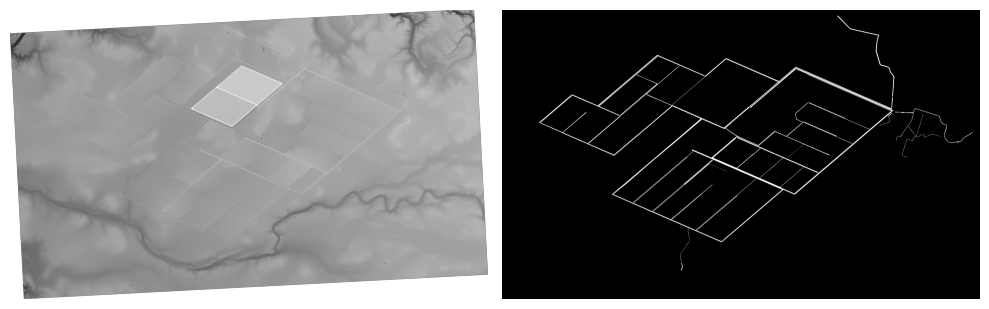

In [15]:
from model_prototyping.unet_implementation.metrics import show_matrices
show_matrices([beermery_data.data_with_labels.data[0], beermery_data.data_with_labels.labels[0]])

In [16]:
combined_data = ModelData.splice_model_data([beermery_data, willowan_data])

In [18]:
from model_prototyping.unet_implementation.modules import train_model, test_model_visual


Epoch 20/700 - loss: 0.1717
lr: 0.0394427551451589


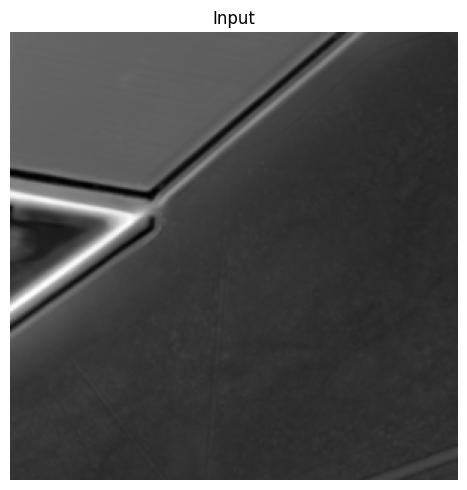

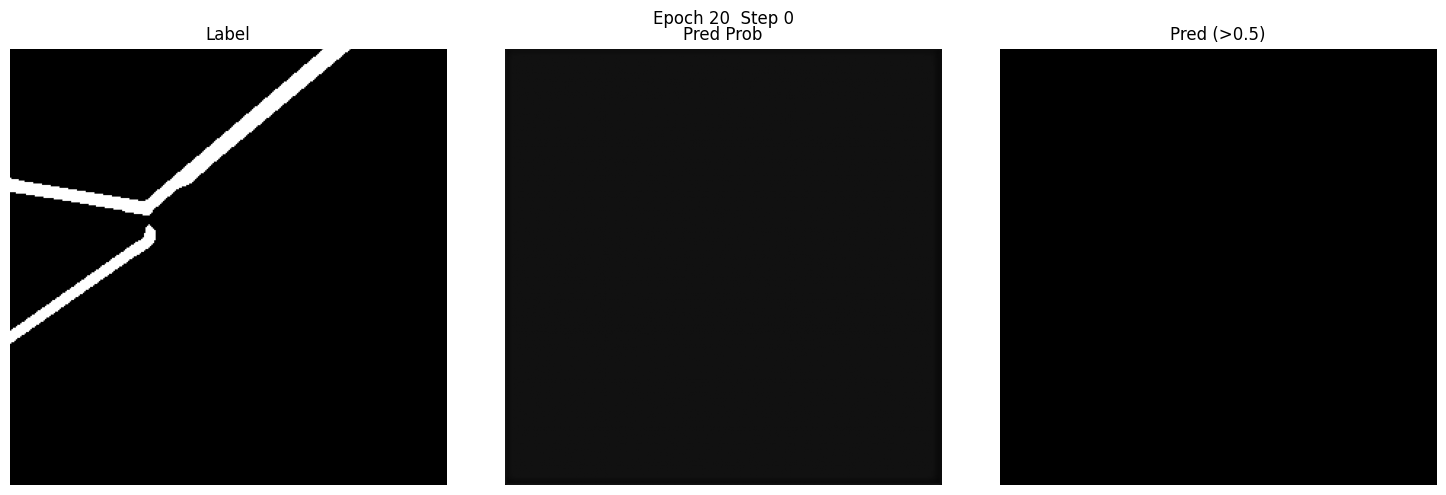

Epoch 40/700 - loss: 0.1723
lr: 0.030132949131853035


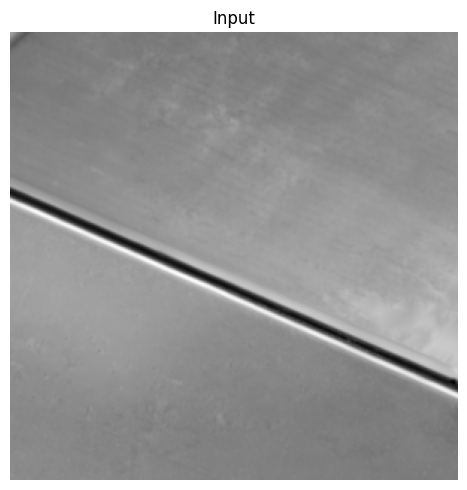

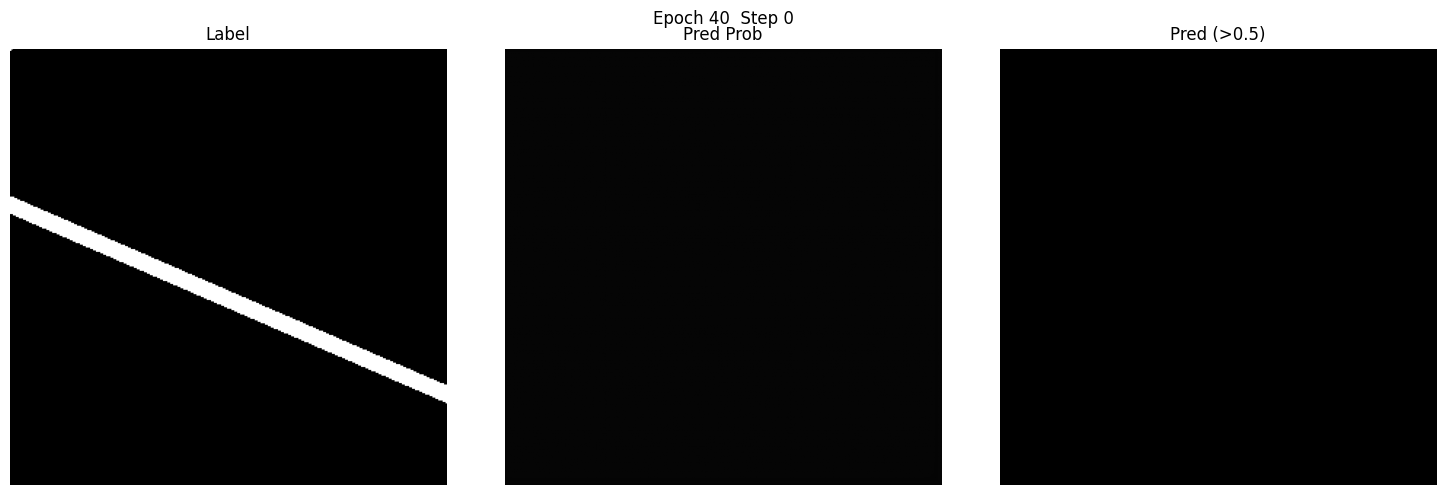

Epoch 60/700 - loss: 0.0349
lr: 0.022510163824502723


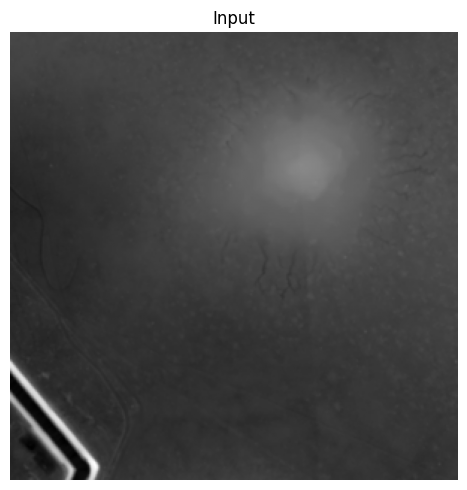

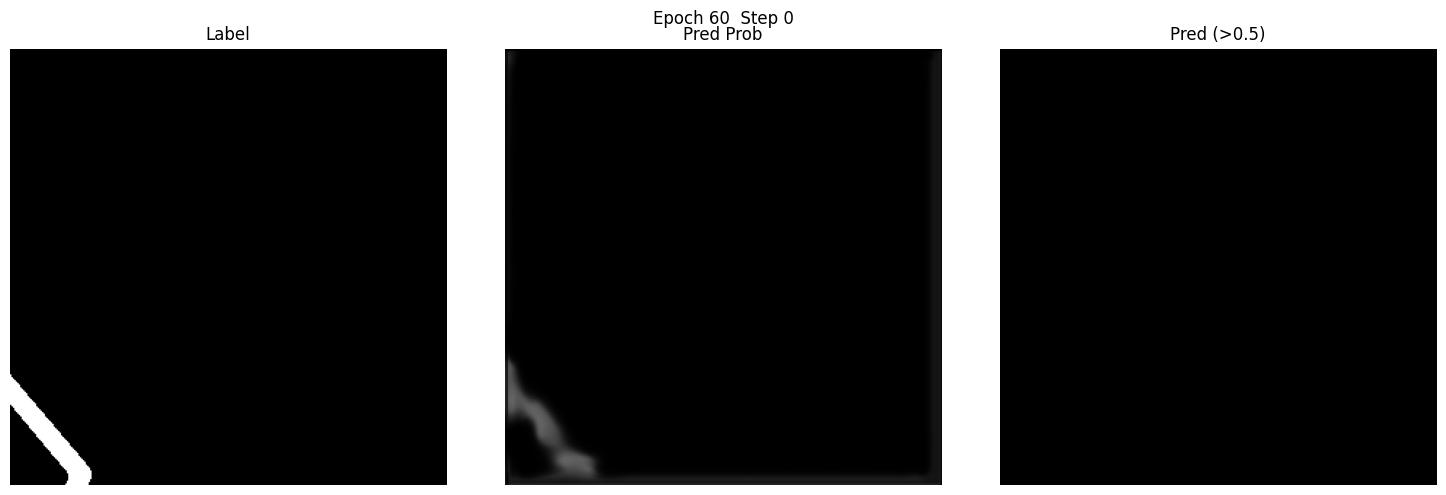

Epoch 80/700 - loss: 0.0042
lr: 0.016412221973957503


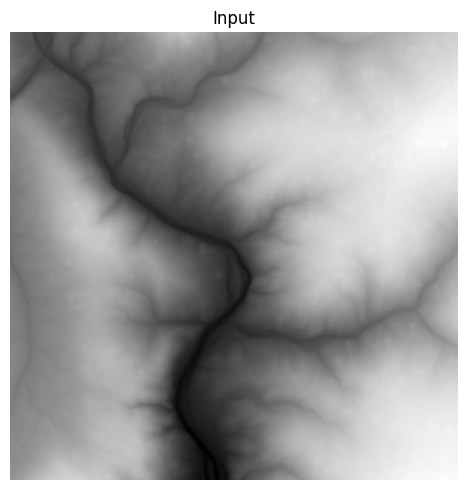

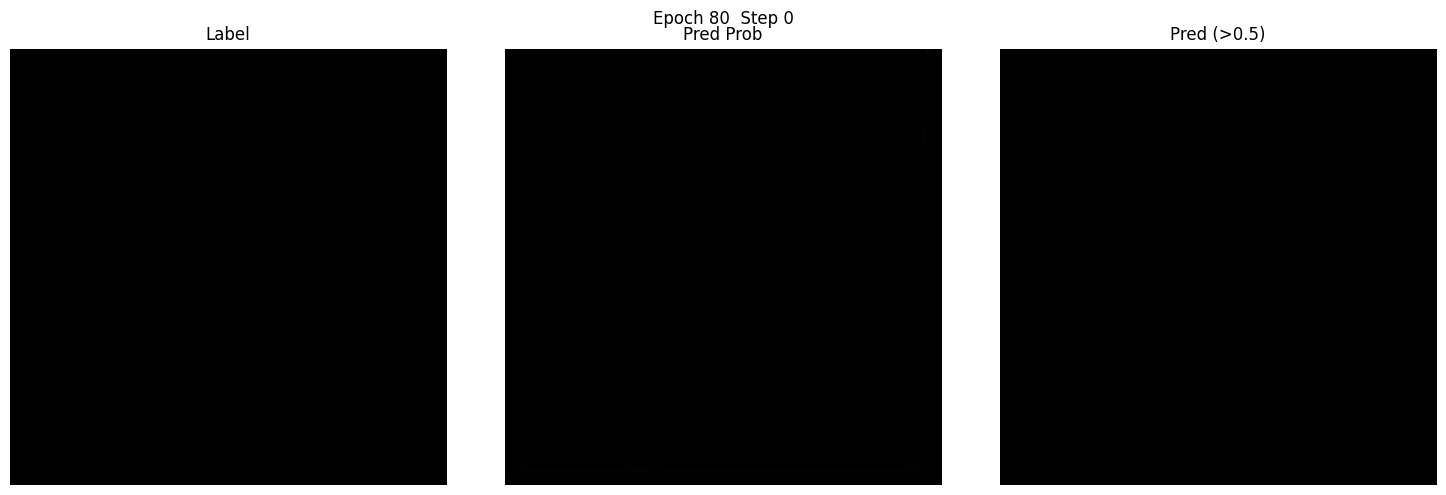

Epoch 100/700 - loss: 0.1717
lr: 0.011655458781401383


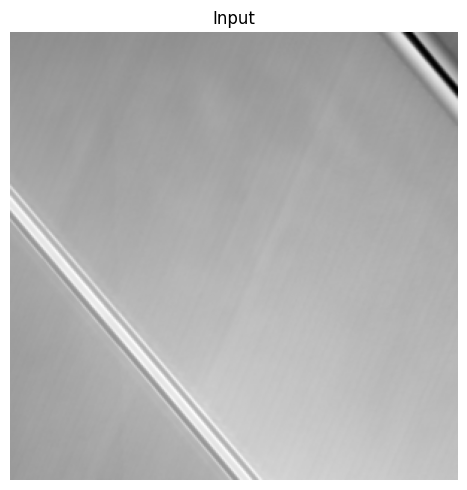

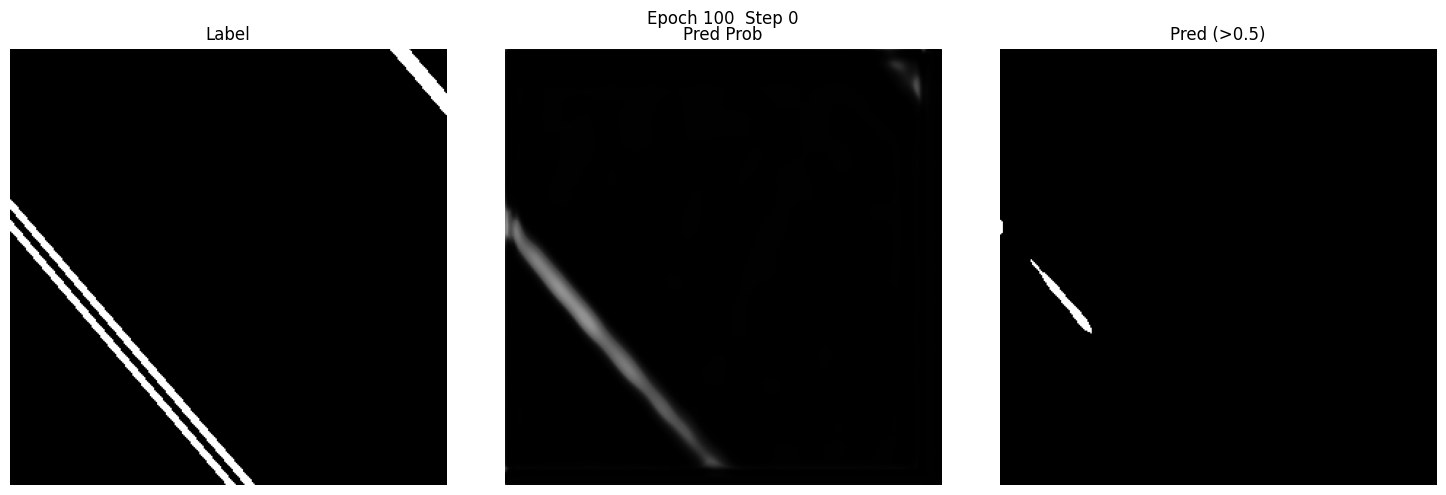

Epoch 120/700 - loss: 0.0703
lr: 0.008044758802225995


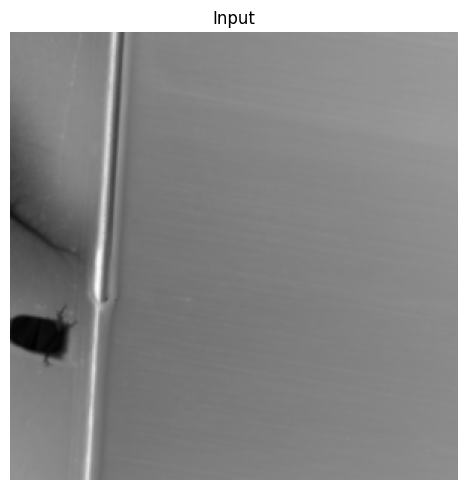

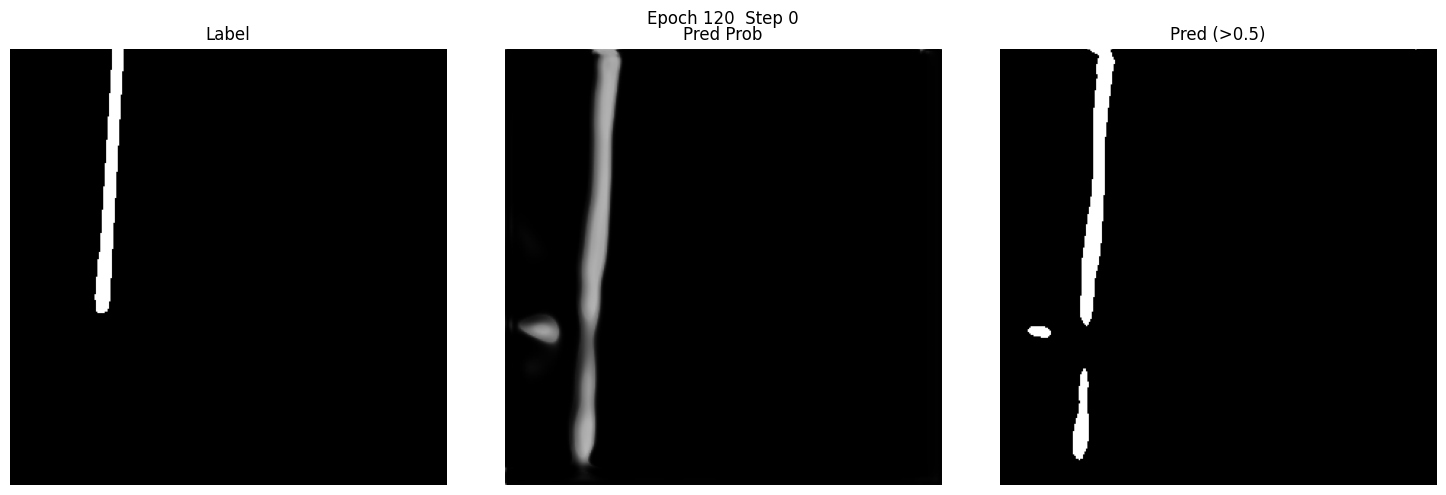

Epoch 140/700 - loss: 0.0537
lr: 0.005383782399608157


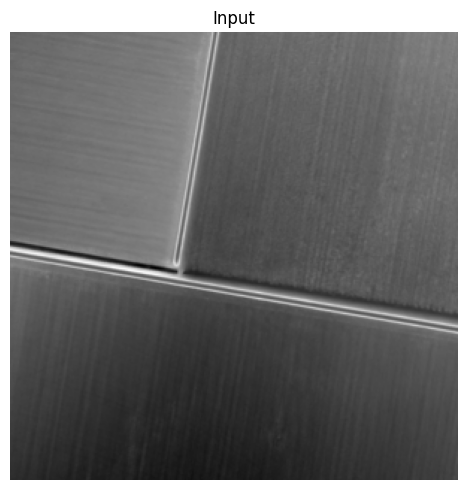

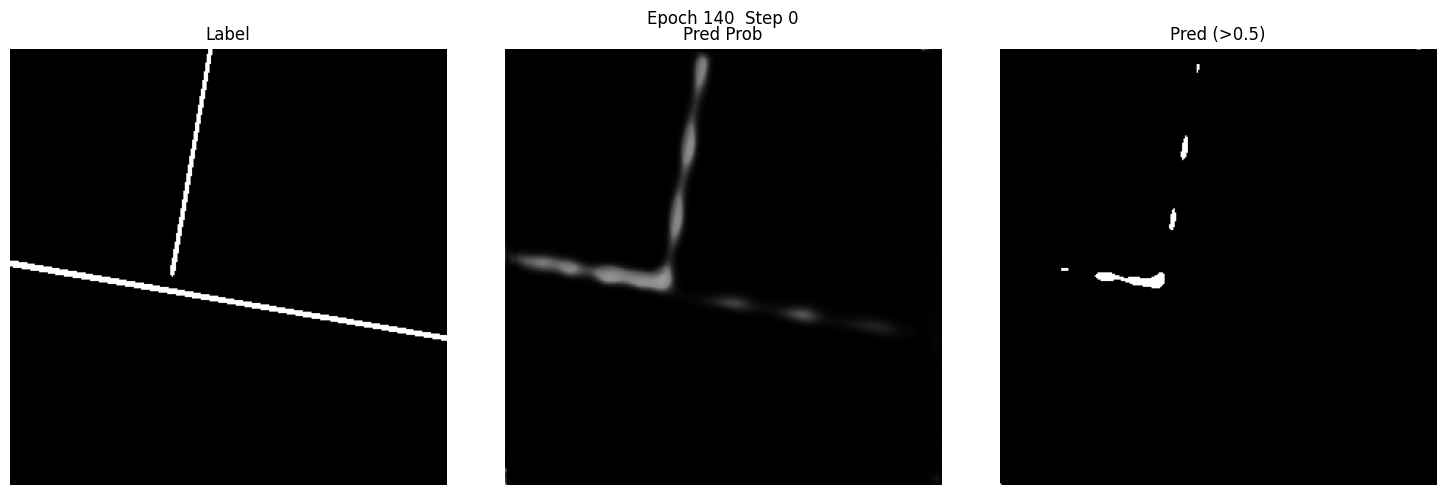

Epoch 160/700 - loss: 0.0953
lr: 0.00348446486431674


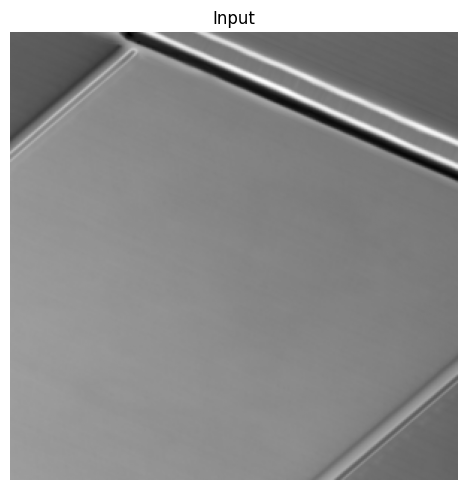

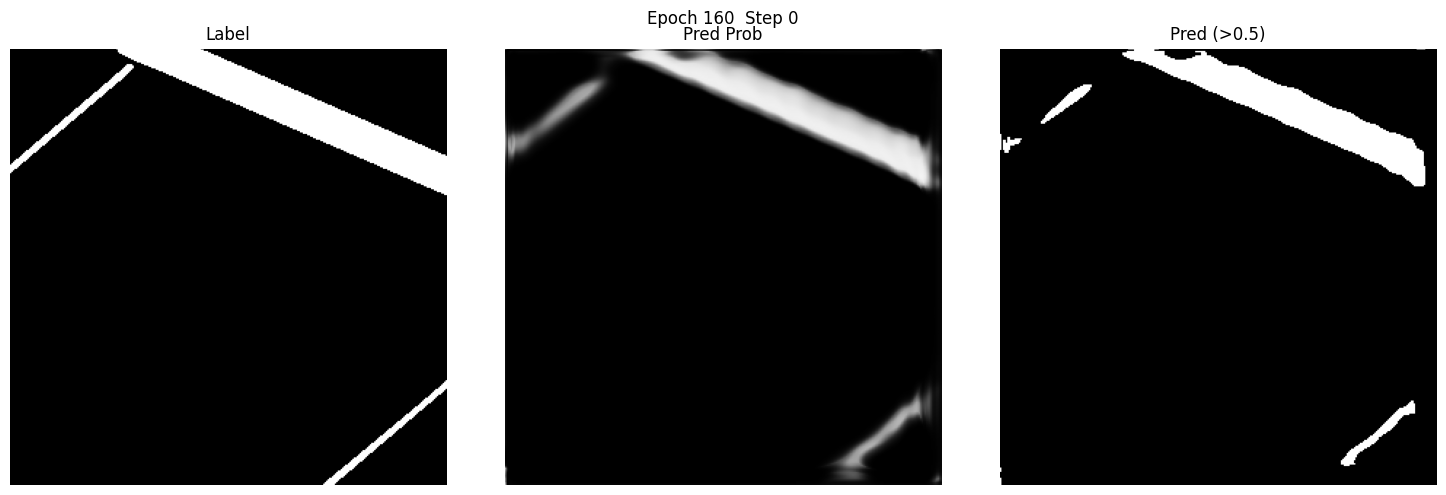

Epoch 180/700 - loss: 0.0104
lr: 0.002174949159060606


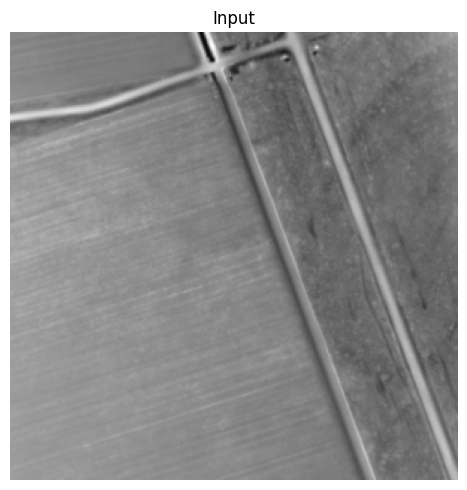

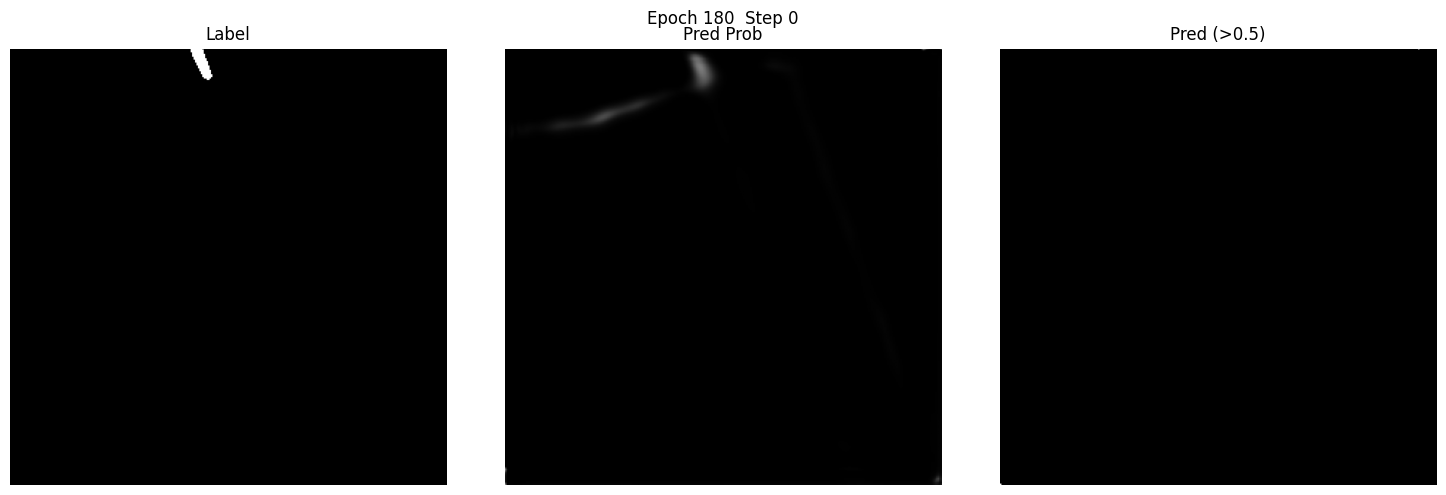

Epoch 200/700 - loss: 0.0518
lr: 0.0013053173919442898


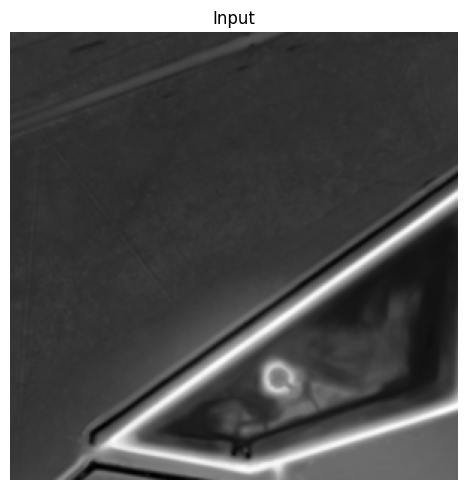

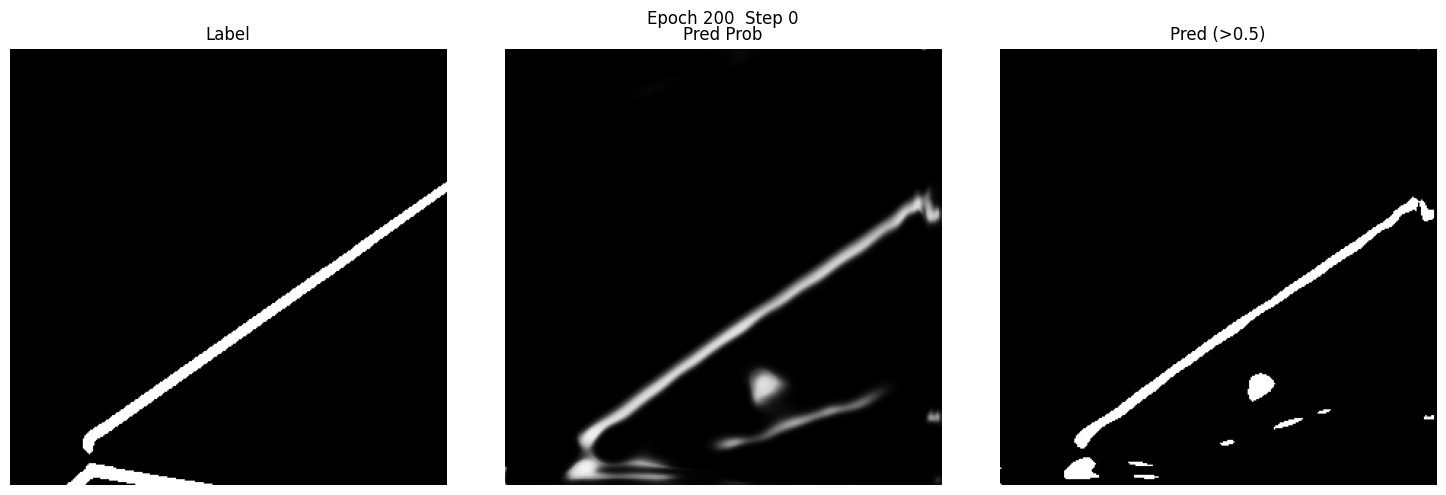

Epoch 220/700 - loss: 0.0514
lr: 0.0007507884291956637


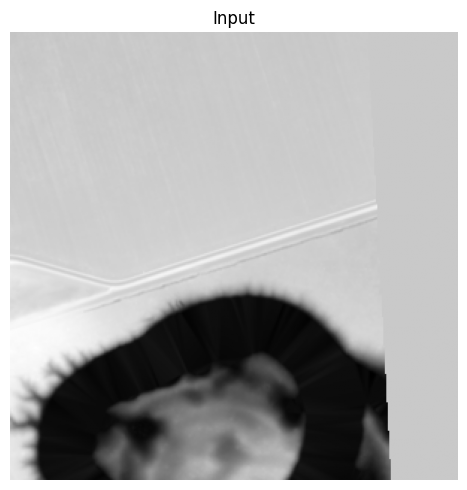

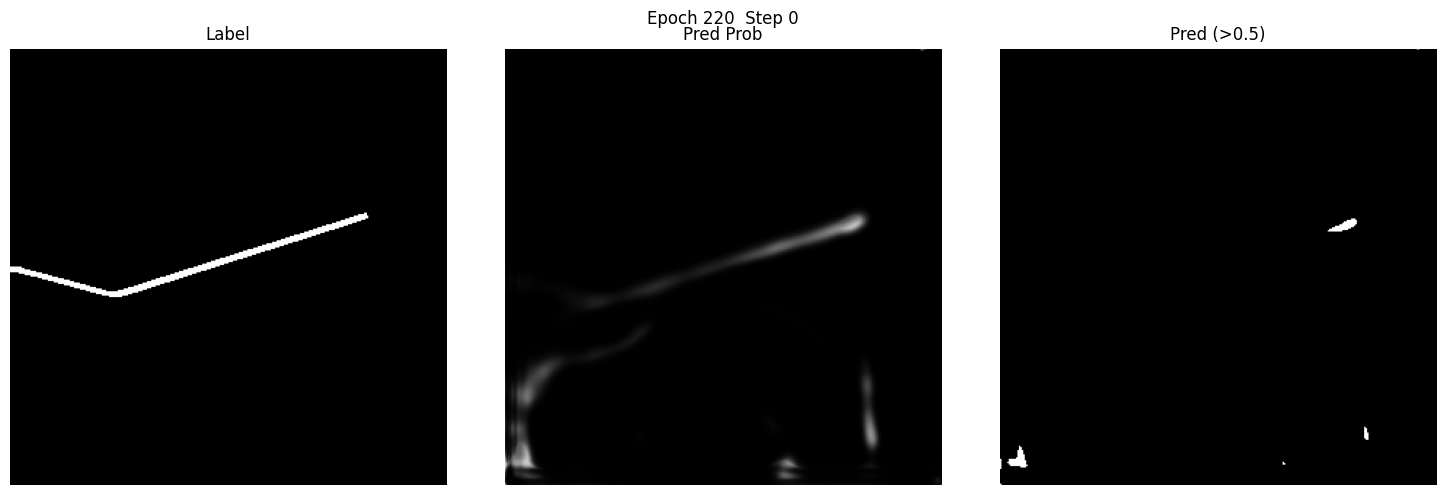

Epoch 240/700 - loss: 0.0559
lr: 0.00041239715950465905


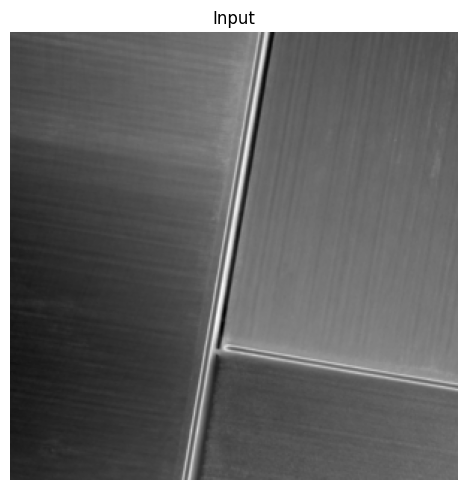

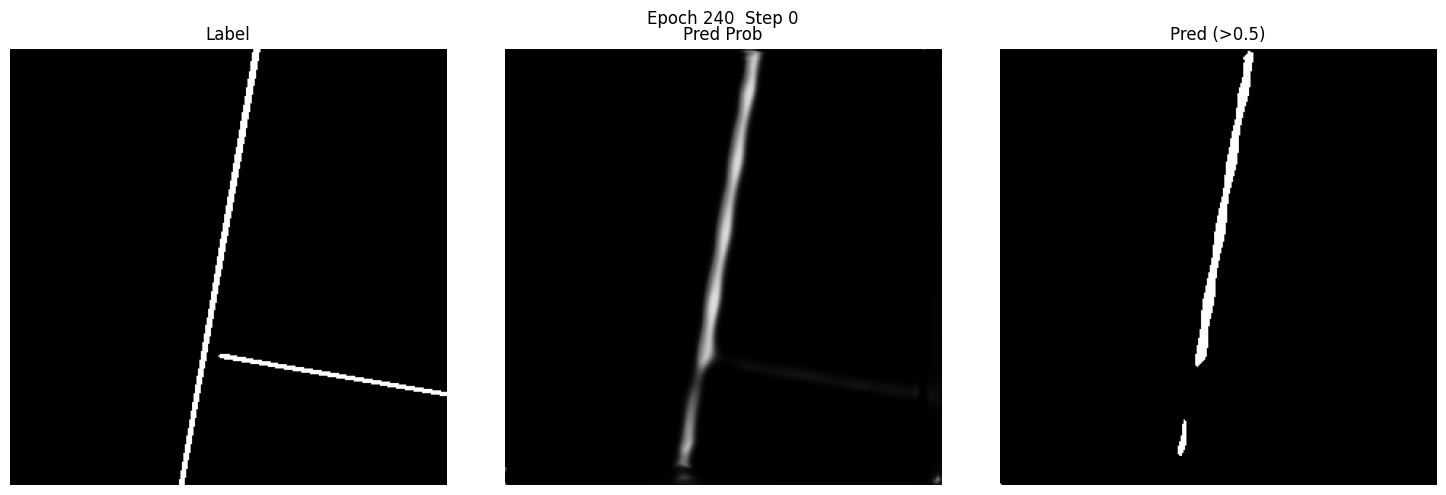

Epoch 260/700 - loss: 0.0506
lr: 0.00021549865340445273


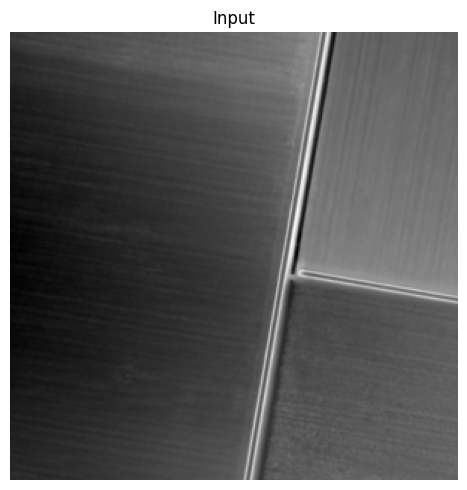

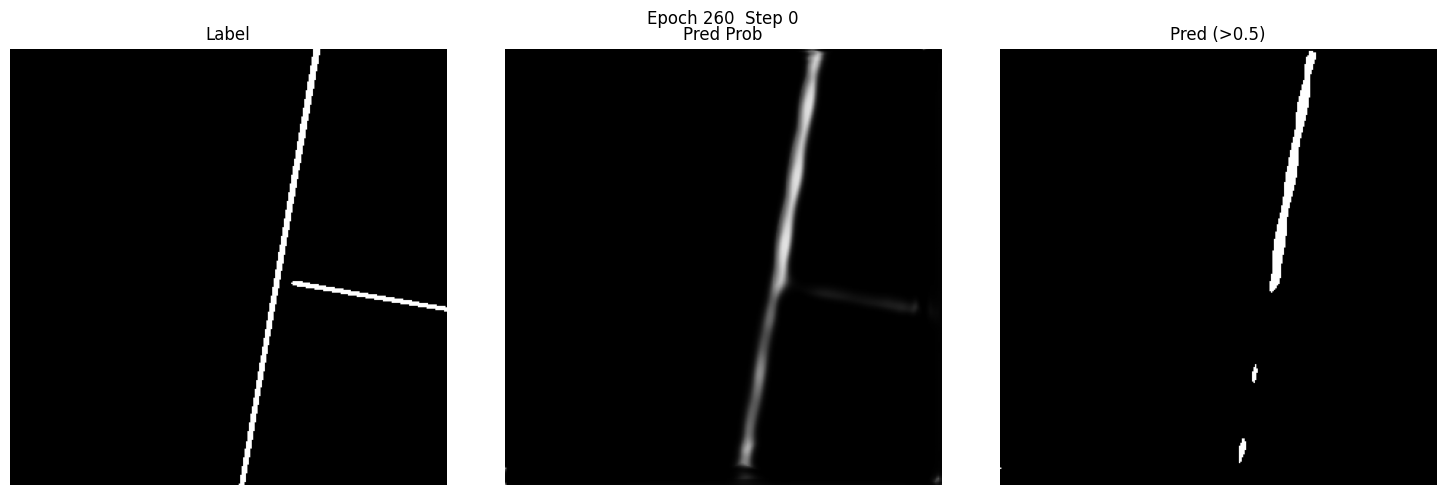

Epoch 280/700 - loss: 0.0161
lr: 0.00010668409582239488


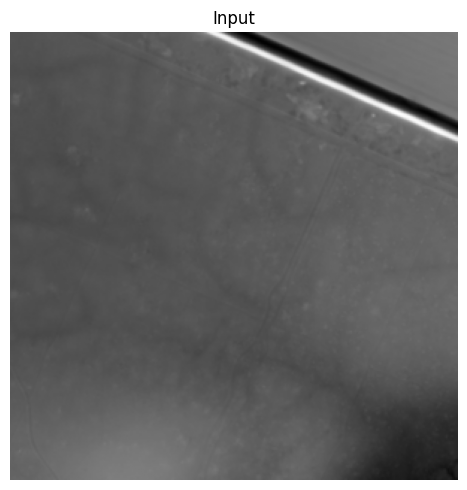

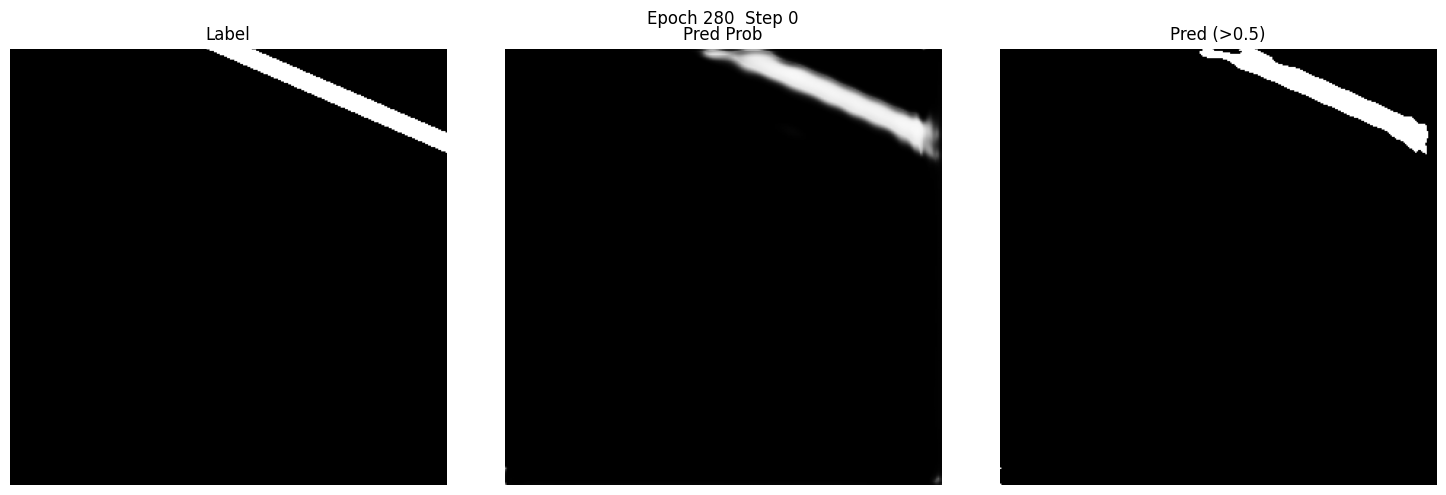

Epoch 300/700 - loss: 0.0006
lr: 4.981110395739801e-05


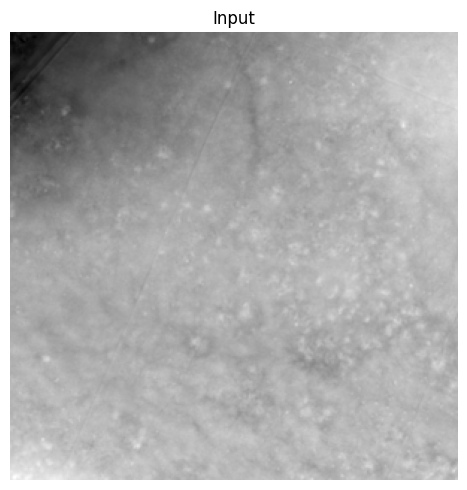

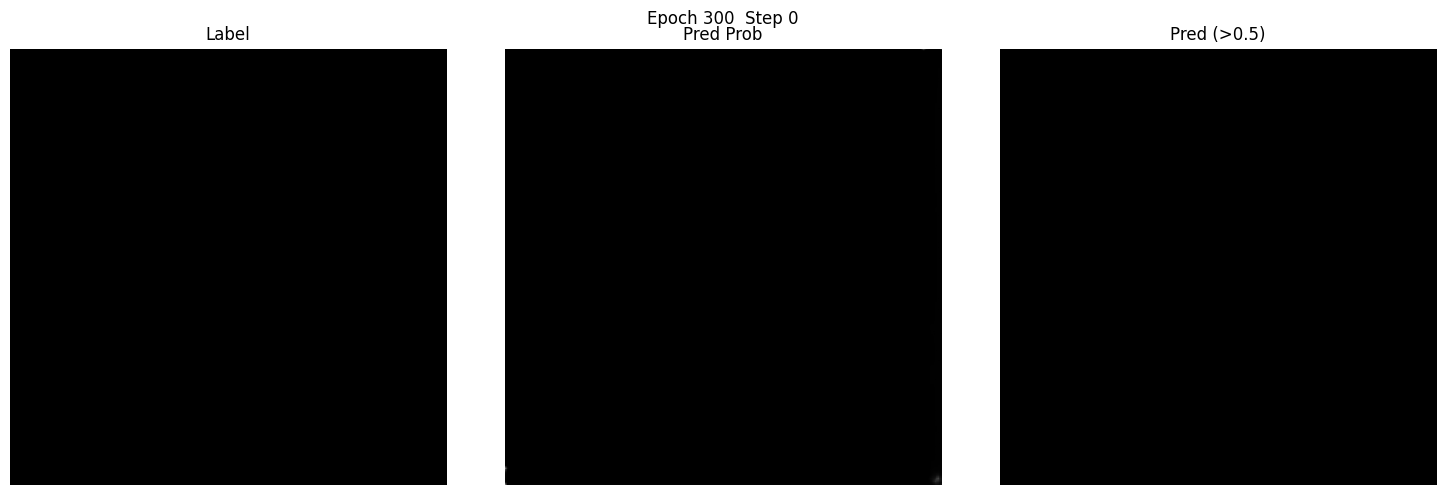

Epoch 320/700 - loss: 0.0007
lr: 2.1827618943968404e-05


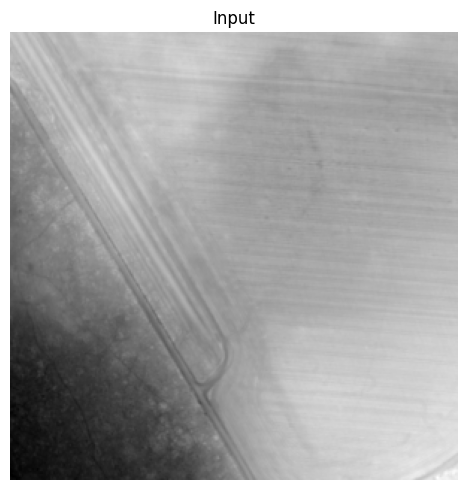

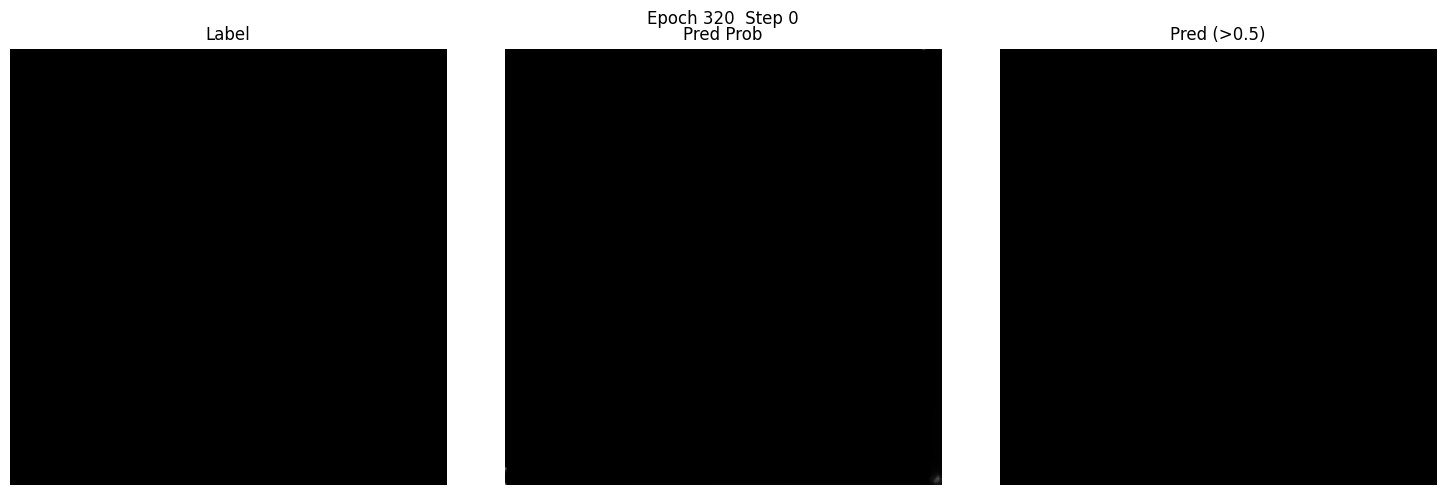

Epoch 340/700 - loss: 0.0810
lr: 8.929893080965906e-06


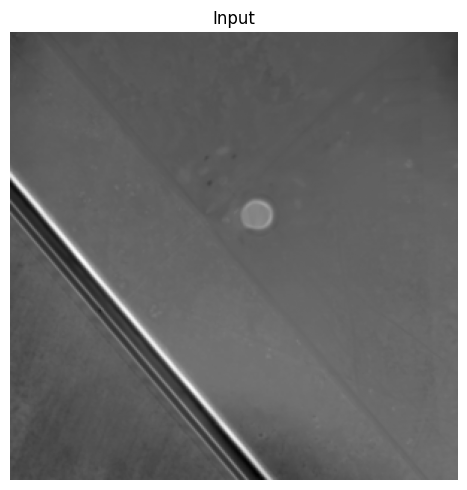

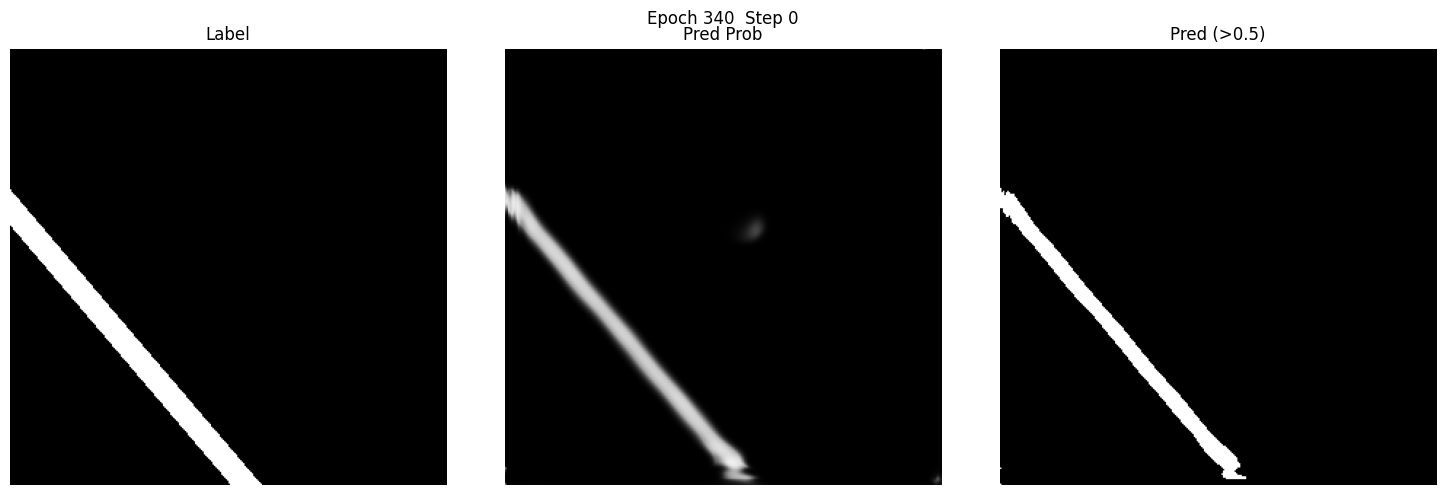

Epoch 360/700 - loss: 0.0167
lr: 3.391257764951464e-06


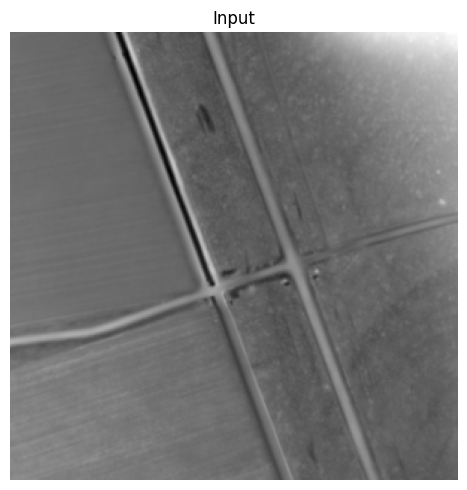

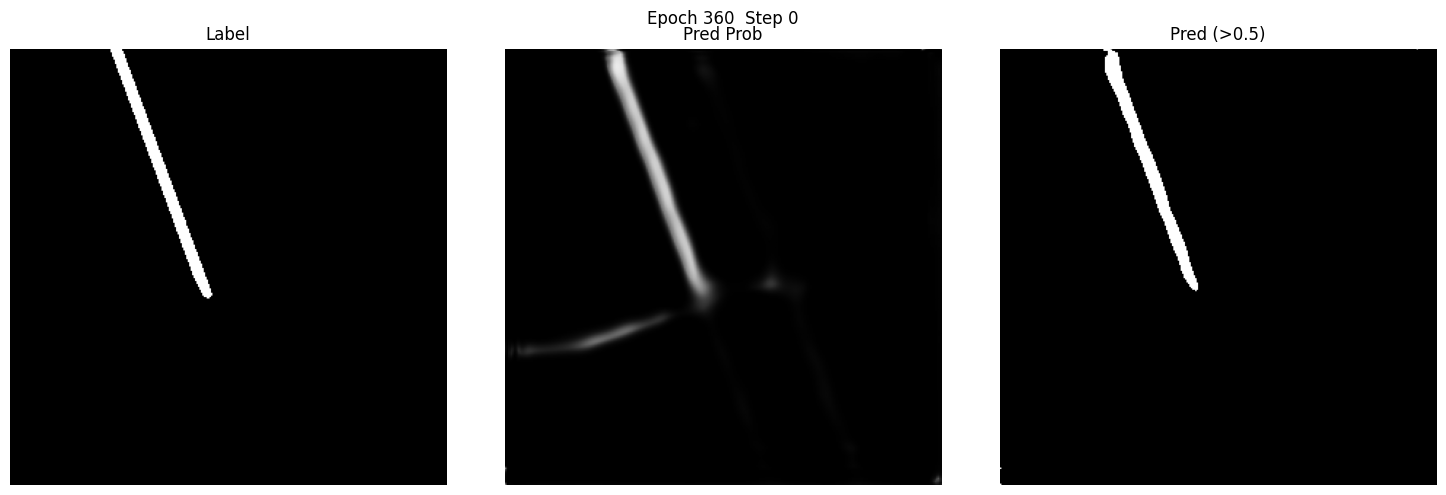

Epoch 380/700 - loss: 0.0148
lr: 1.2110067189281395e-06


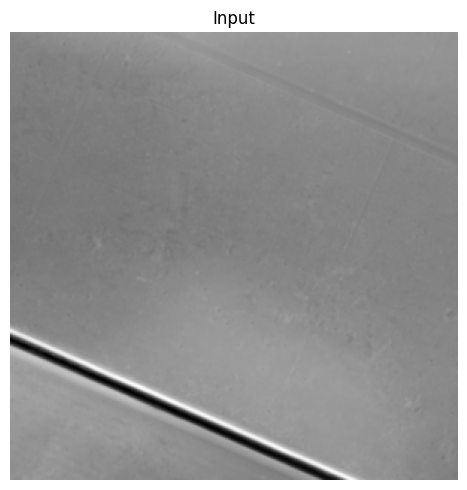

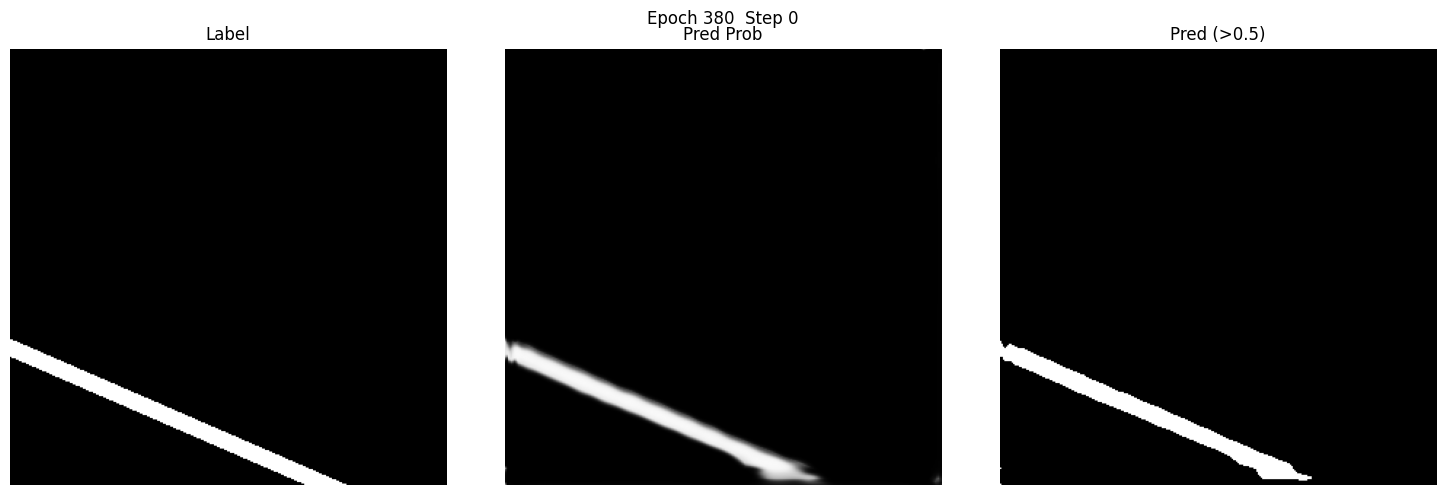

Epoch 400/700 - loss: 0.1061
lr: 4.0342565148606187e-07


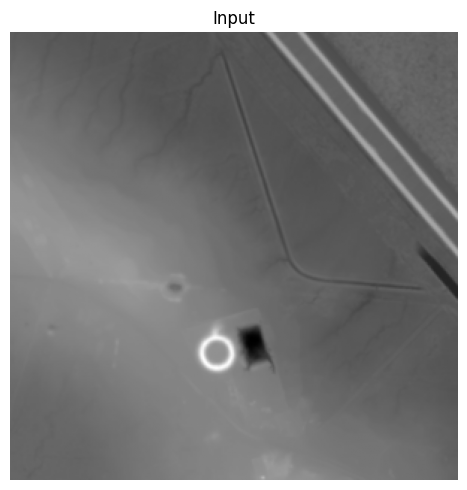

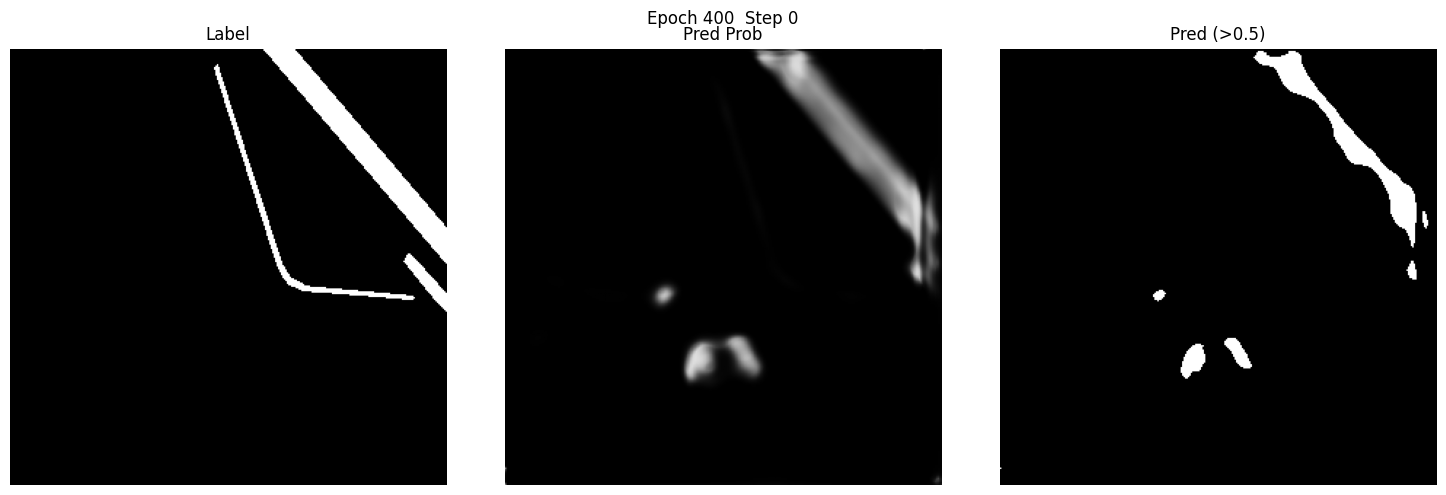

Epoch 420/700 - loss: 0.0101
lr: 1.1837546783322087e-07


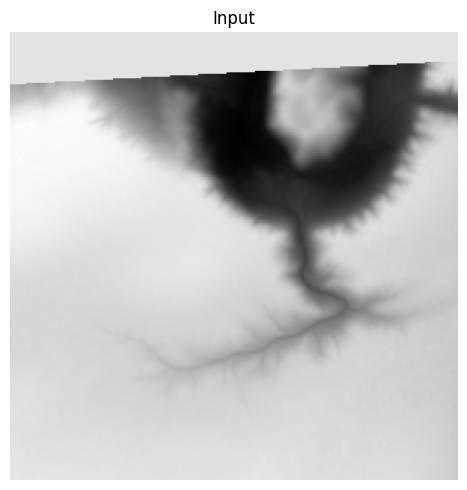

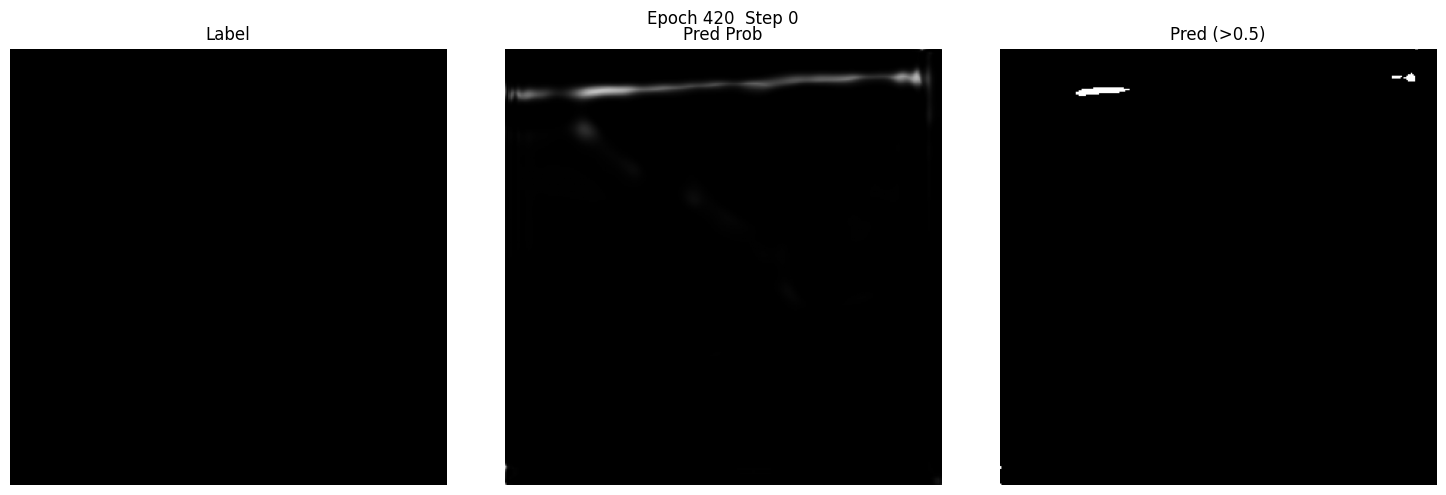

Epoch 440/700 - loss: 0.0009
lr: 3.13627407751703e-08


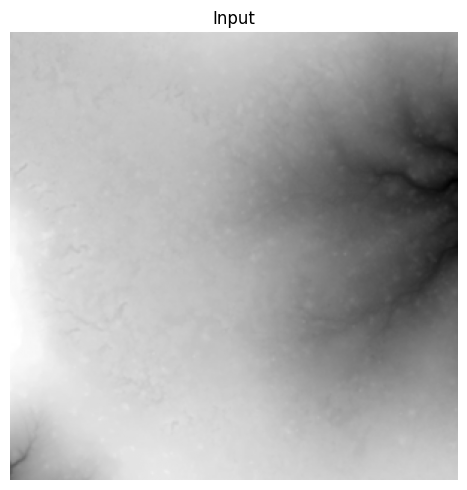

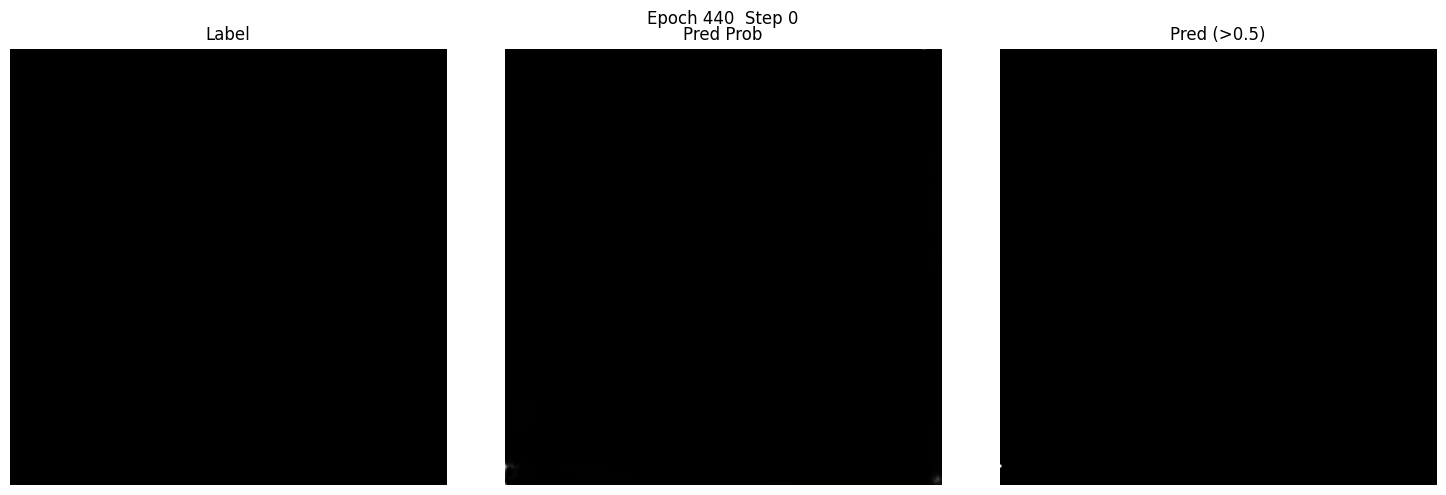

Epoch 460/700 - loss: 0.1958
lr: 7.75155000130039e-09


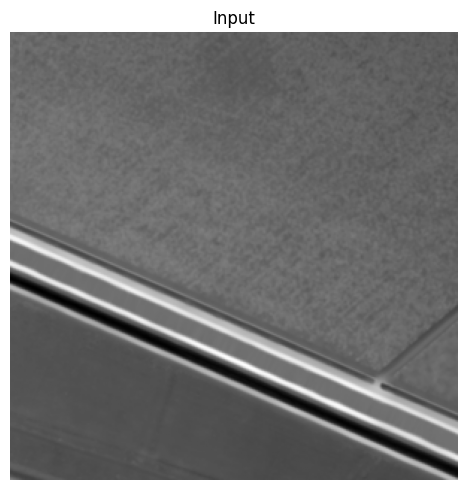

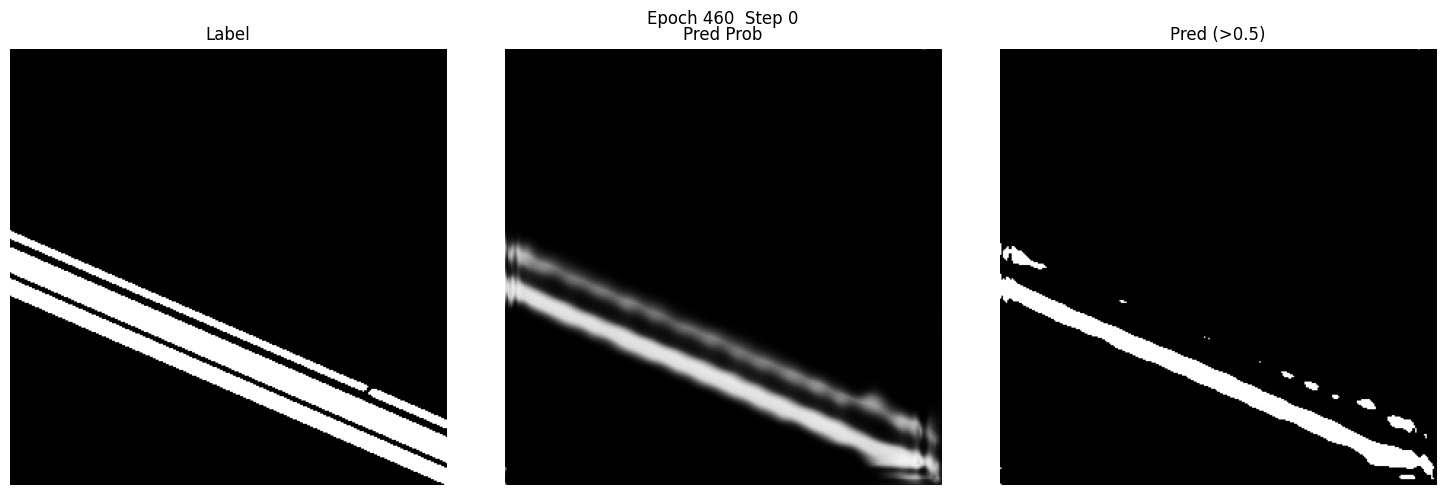

Epoch 480/700 - loss: 0.0653
lr: 1.6366272864389201e-09


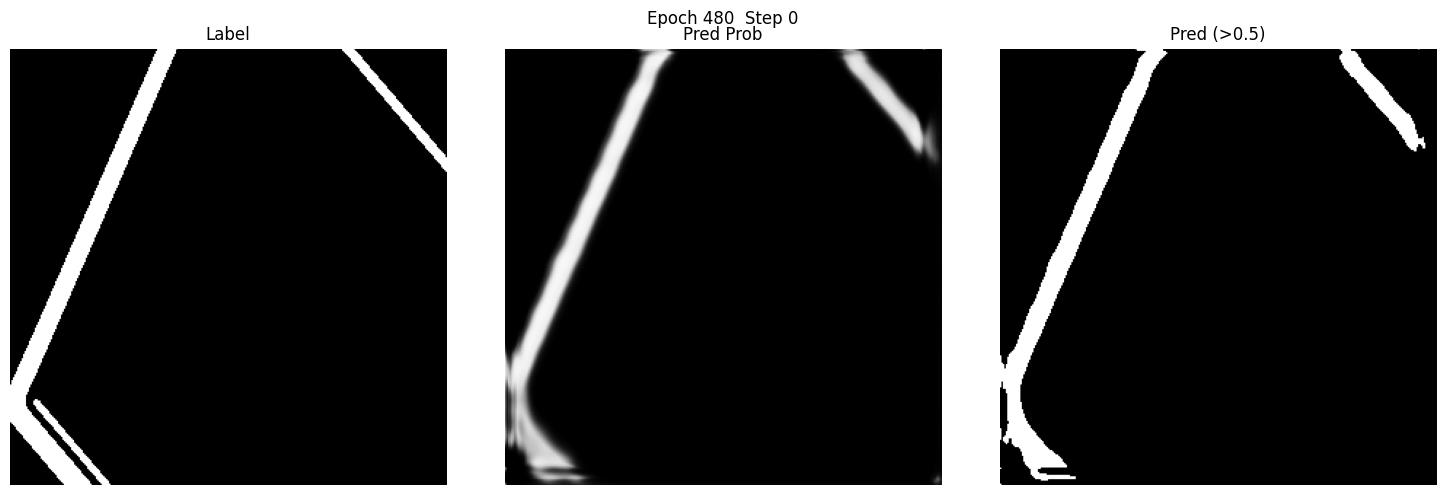

Epoch 500/700 - loss: 0.1141
lr: 3.035718945727876e-10


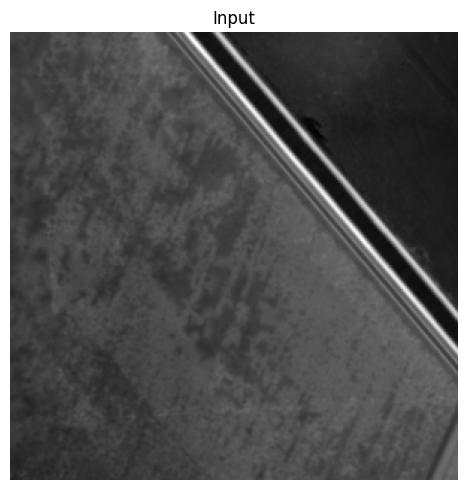

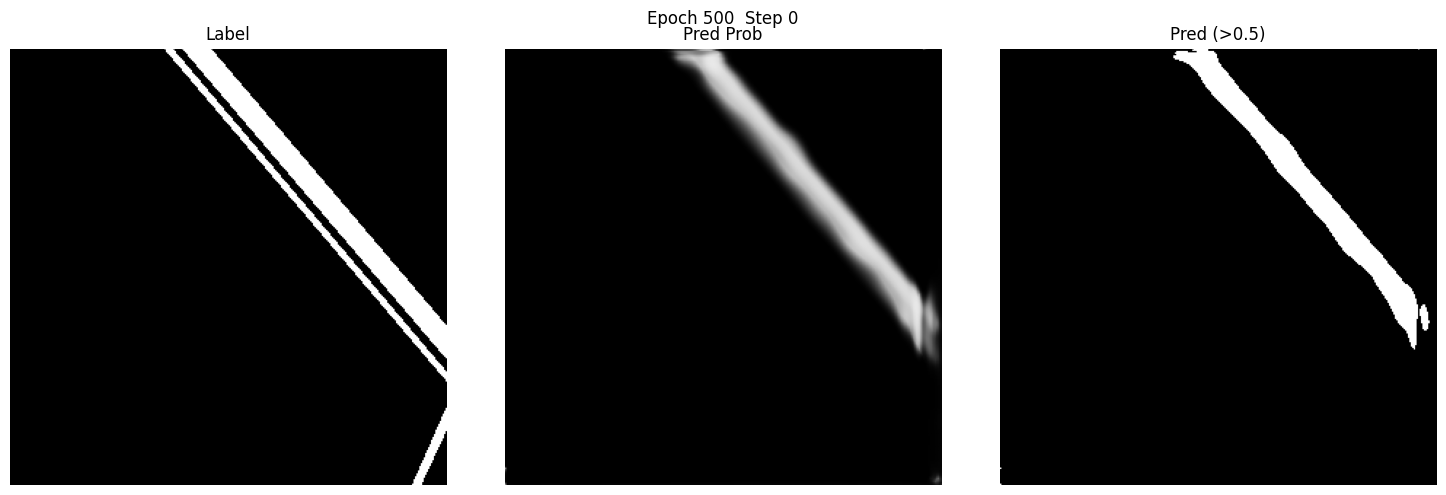

Epoch 520/700 - loss: 0.0492
lr: 4.893724402812111e-11


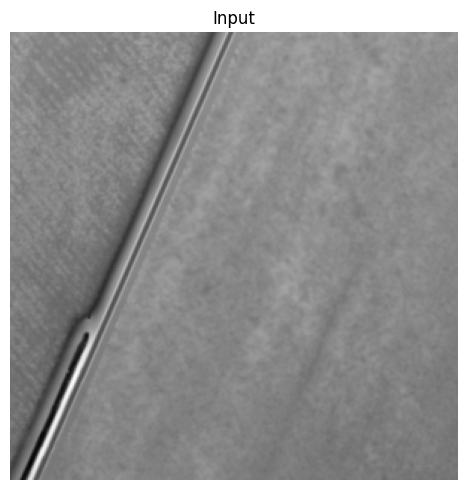

Epoch 540/700 - loss: 0.0171
lr: 6.776557942491805e-12


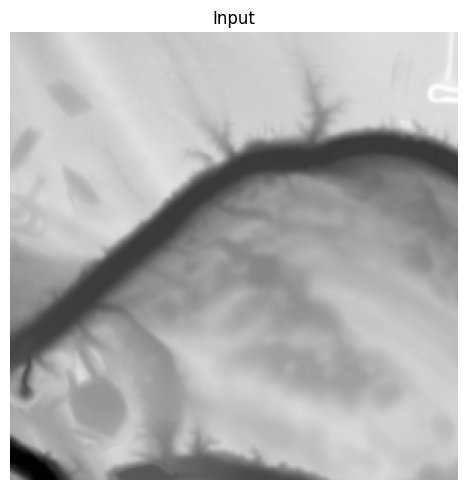

Epoch 560/700 - loss: 0.0432
lr: 7.959273718617956e-13


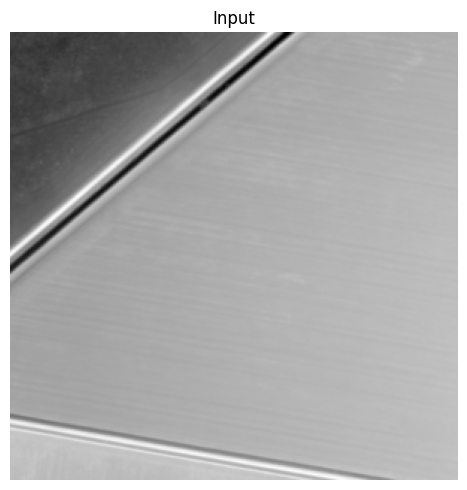

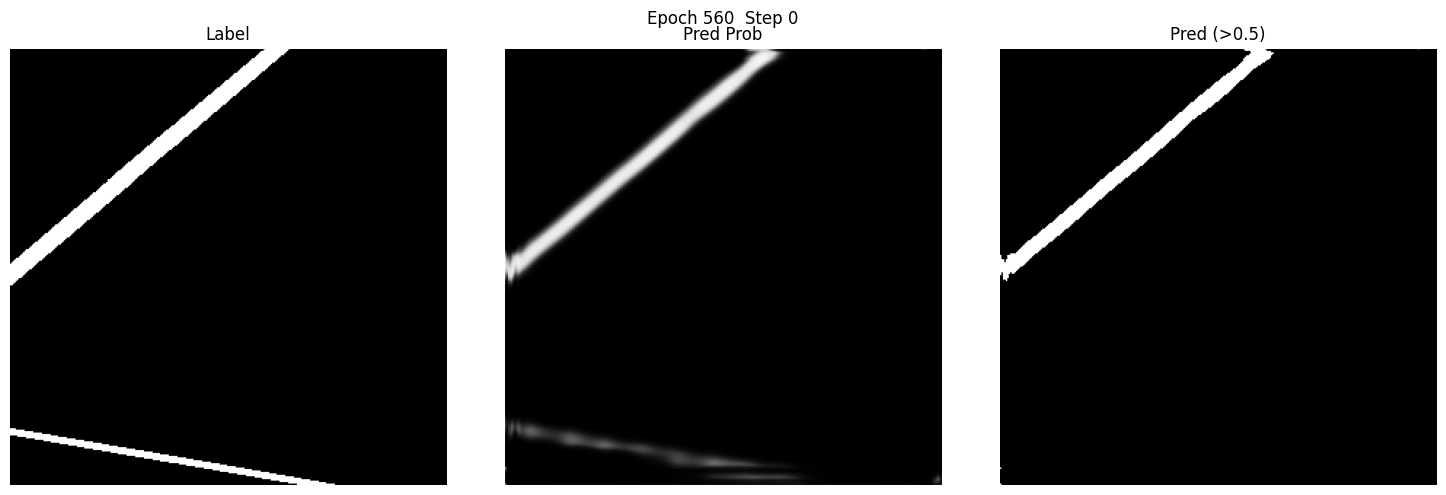

Epoch 580/700 - loss: 0.0491
lr: 7.821274131358822e-14


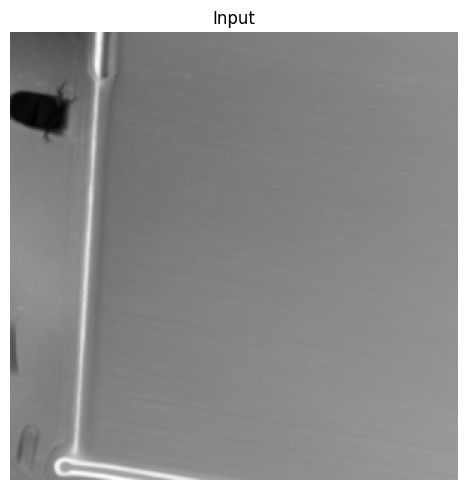

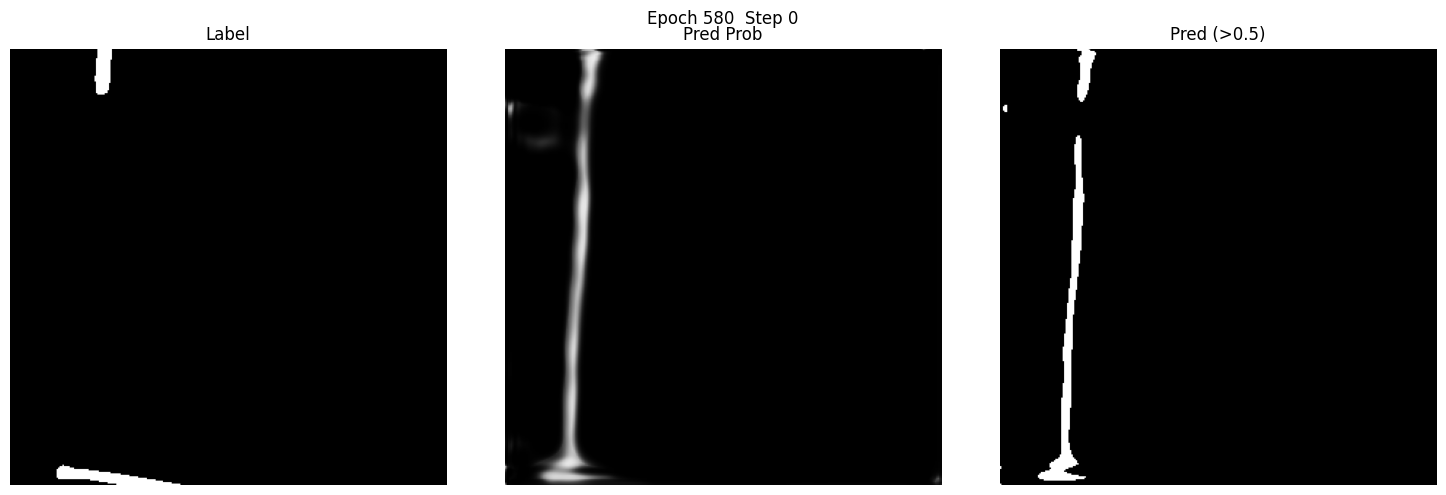

Epoch 600/700 - loss: 0.0808
lr: 6.335349754408291e-15


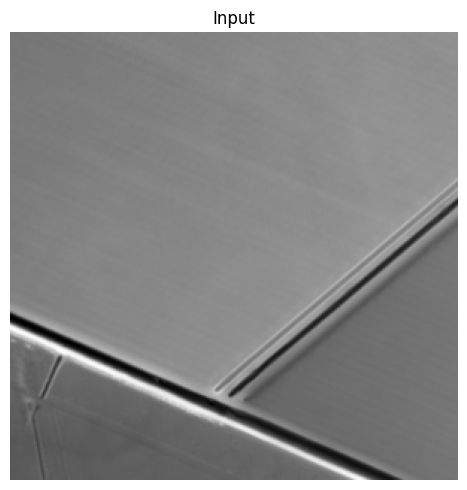

Epoch 620/700 - loss: 0.0764
lr: 4.1626004977112815e-16


Epoch 640/700 - loss: 0.0275
lr: 2.1801681772849758e-17


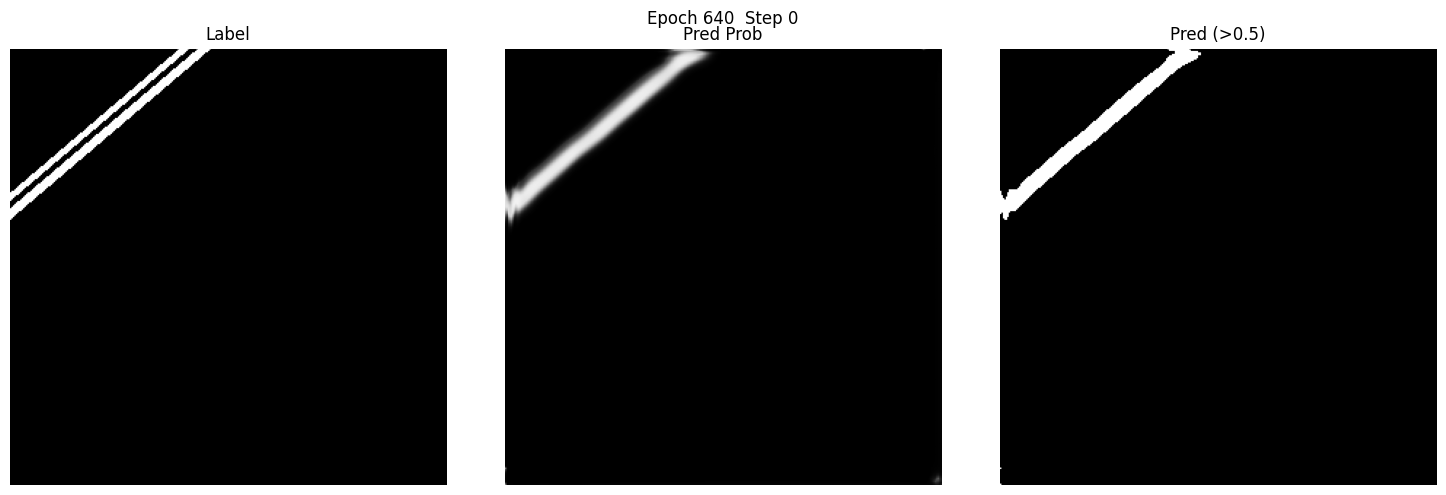

Epoch 660/700 - loss: 0.0369
lr: 8.931945381263193e-19


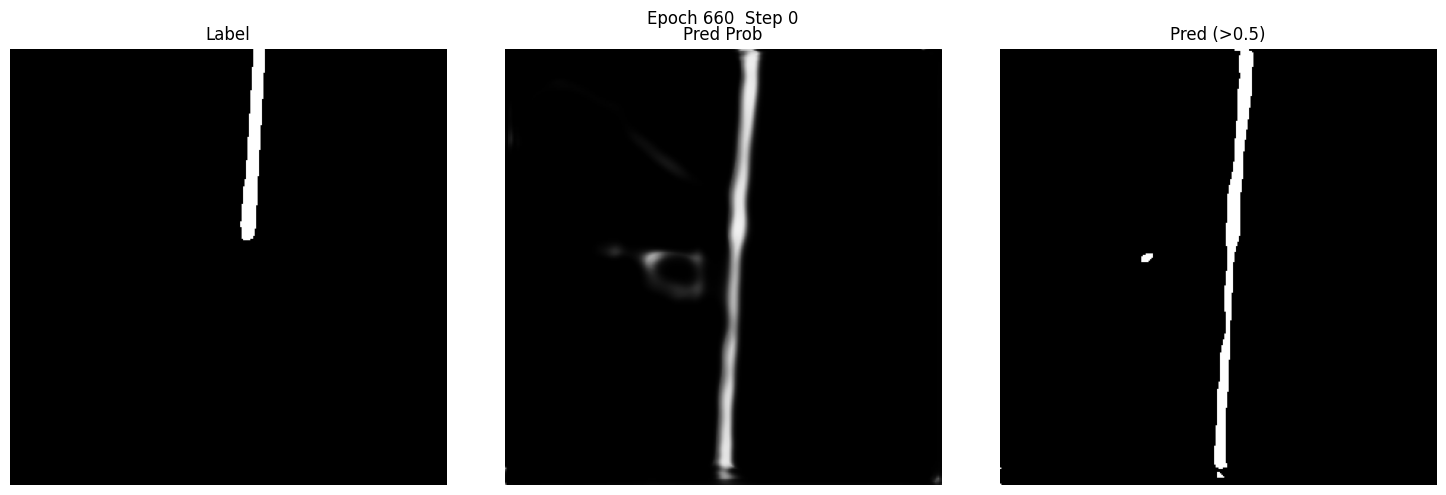

Epoch 680/700 - loss: 0.0532
lr: 2.8044627673691593e-20


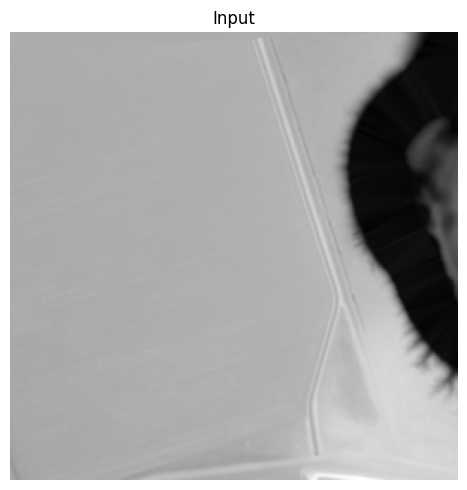

Epoch 700/700 - loss: 0.0276
lr: 6.600515162724538e-22


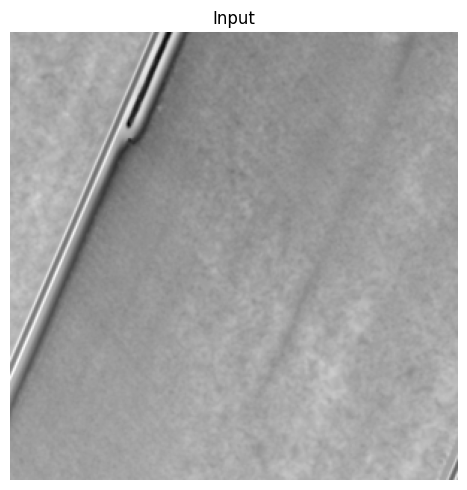

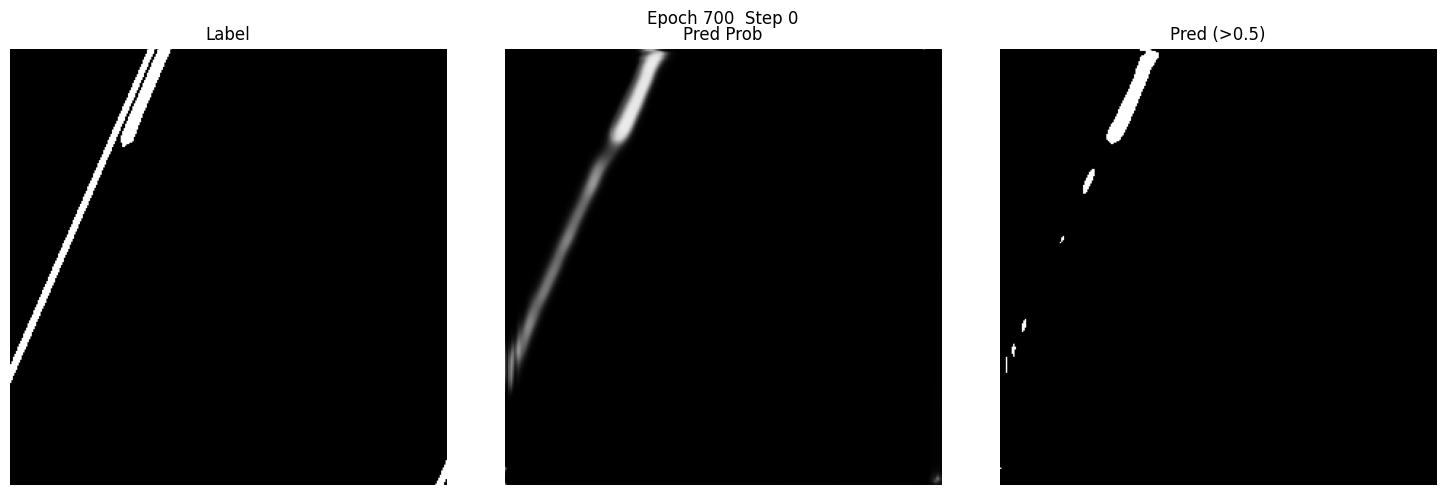

In [ ]:
model = train_model(combined_data, 
                    num_epochs=300, 
                    viz_every = 20, 
                    features=[16,32], 
                    lr=5e-2, 
                    lr_decay=1.0002, 
                    pos_bias=1)

In [ ]:
break code here

In [ ]:
standardise_dataset("TEST_SET", force=True, target_files=["COMBINED.tif"])
test_model_visual(model, "TEST_DATASET")

RasterioIOError: data\TEST_SET\POSITIVE_STANDARDISED.tif: No such file or directory

In [ ]:
BREAKCODE WITH THIS LINE